<a href="https://colab.research.google.com/github/Yash-11want/Find-your_destination/blob/main/MultivariateGaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


we are using  scipy.stats  to import multivariate_normal to calculate the likelihood probabilities (which is gaussian distribution have mean : mean_l,covariances : cov_l, for each  label)

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import multivariate_normal # Importing multivariate_normal0

In [5]:
class MultivariateGaussianClassifier:
    def __init__(self):
        self.priors_prob = {}  # creating a  empty dictionary for storing the probabilities of labels.
        self.means = {}        # creating a  empty dictionary for storing the mean of the same type labels.
        self.covariances = {}  #  creating a  empty dictionary for storing the covariances for same type of labels.
        #self.log_dets = {}  # Store log determinants of covariance matrices

    def fit(self, X, y):
        n_samp,n_fea = X.shape  # variables for storing  length samples and features
        self.labels = np.unique(y)  # storing different labels
        n_labels = len(self.labels) # total no.of different type of labels

        for label in self.labels:
            X_l = X[y == label]
            mean_l = np.mean(X_l, axis=0)
            #(np.eye(X_l.shape[1]) * 1e-6) it adds a small constant to the diagonal of the covariance matrix to
            #prevent it from being singular (non-invertible).
            cov_l = np.cov(X_l.T) + np.eye(X_l.shape[1]) * 1e-6  # Regularization :

            # Precompute log determinant
            #log_det_l = np.log(np.linalg.det(cov_l))

            self.means[label] = mean_l #storing the mean of the each labels.
            self.covariances[label] = cov_l #storing the covariances for each labels
            #self.log_dets[label] = log_det_l
            self.priors_prob[label] = X_l.shape[0] / n_samp # Fixed: probabilities (prior) for each label

    def predict(self, X):

        #calculating log of likelihood probabilities by using multivariate_normal (taking total mean and covariances matrix and )
        #using pdf(gaussian distribution ) returning all probabilities for each labels
        log_likelihood = [multivariate_normal.logpdf(X, mean=self.means[c], cov=self.covariances[c]) for c in self.labels]
        log_post_probs = [self.priors_prob[l] + log_likelihood[l]  for l in self.labels]  # Discriminant function

        return self.labels[np.argmax(log_post_probs, axis=0)]  # Vectorized label selection # Fixed: Indentation and axis is changed to 0

In [6]:
df = pd.read_csv('/content/drive/MyDrive/prml/hog_data.csv')
X = df.drop('label', axis=1).values
y = df['label'].values

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Accuracy with 350 components: 34.94%
Accuracy with 450 components: 36.37%
Accuracy with 550 components: 36.32%
Accuracy with 650 components: 36.97%
Accuracy with 750 components: 36.97%
Accuracy with 850 components: 37.22%
Accuracy with 950 components: 37.61%
Accuracy with 1050 components: 37.46%
Accuracy with 1150 components: 37.81%
Accuracy with 1250 components: 37.96%
Accuracy with 1350 components: 38.31%
Accuracy with 1450 components: 38.40%


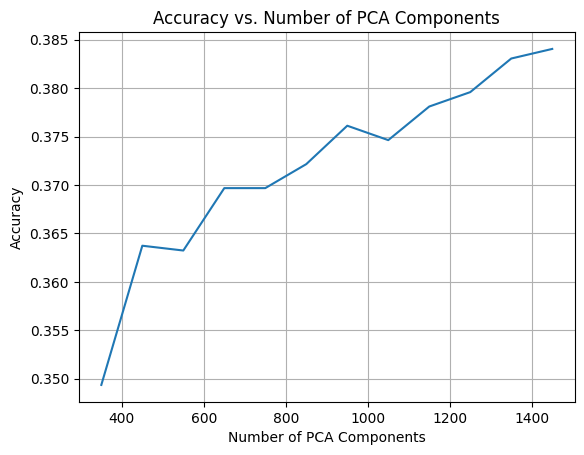

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Range of PCA components to test
n_components_range = range(350, 1500, 100)  # Start from 10, in steps of 10
accuracies = []

for n_components in n_components_range:
    # Apply PCA with current number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train classifier on PCA-transformed data
    classifier = MultivariateGaussianClassifier()
    classifier.fit(X_train_pca, y_train)

    # Predict and evaluate
    y_pred_pca = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_pca)
    accuracies.append(accuracy)
    print(f"Accuracy with {n_components} components: {accuracy * 100:.2f}%")

# Plot accuracy vs. number of PCA components
plt.plot(n_components_range, accuracies)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of PCA Components")
plt.grid(True)
plt.show()